## Lib

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils.import_df import import_df
from utils.check_existing_file import check_file
from utils.img_preprocessing import get_features_target, img_preprocessing, generate_dataset

## Vars

In [3]:
csv_url = "../../storage/datas/csv/clean/cleaned_dataset_with_features_top_10_species.csv"
img_directory = "/home/guillaume/Téléchargements/mushroom-dataset/clean_dataset/"

## 1 - import DF

### Full Dataset

In [4]:
# Full Dataset
df = import_df(csv_url)

DF loaded with shape: (15200, 15)
Unique species in DF: 11


In [5]:
df["species"].value_counts()

species
Pleurotus ostreatus      1623
Trametes versicolor      1608
Pluteus cervinus         1470
other                    1400
Lepista nuda             1356
Psilocybe zapotecorum    1350
Psilocybe cyanescens     1310
Boletus edulis           1303
Hypholoma fasciculare    1293
Ganoderma applanatum     1281
Galerina marginata       1206
Name: count, dtype: int64

### Sample

In [6]:
# 10% Sample
df_sample_10 = import_df(csv_url,
                         sample = True,
                         sample_size = 0.1,
                         random_state=1)

DF sampled with 10.0% from original dataset, shape: (1520, 15)
Unique species in sampled DF: 11


In [7]:
df_sample_10["species"].value_counts()

species
Pleurotus ostreatus      169
Trametes versicolor      156
other                    145
Lepista nuda             142
Boletus edulis           136
Hypholoma fasciculare    135
Ganoderma applanatum     135
Pluteus cervinus         133
Psilocybe cyanescens     124
Psilocybe zapotecorum    123
Galerina marginata       122
Name: count, dtype: int64

## 2 - Check if all image files exist

In [8]:
check_file(img_directory = img_directory,
           df = df)

All files found!


In [9]:
check_file(img_directory = img_directory,
           df = df_sample_10)

All files found!


## 3 - Df column selection

In [10]:
target_column = "species"
img_link_column = "image_lien"

In [11]:
df = df[[target_column, img_link_column]]
df_sample_10 = df_sample_10[[target_column, img_link_column]]

In [13]:
df["image_lien"] = df["image_lien"].apply(lambda x: os.path.join(img_directory, x))
df_sample_10["image_lien"] = df_sample_10["image_lien"].apply(lambda x: os.path.join(img_directory, x))

## 4 - img Preprocessing

### Features & Targets

In [14]:
# Get features & target
df_features, df_target = get_features_target(df, target_column_name = "species")
df_sample_10_features, df_sample_10_target = get_features_target(df_sample_10, target_column_name = "species")

### Img Load & Preprocessing

In [15]:
# Try random images pre-processing
n_random = 5
random_images = df_features["image_lien"].sample(n_random)

img_preprocessing_args = {
    "dimensions": (224,224),
    "resize": True,
    "augment": True,
    "normalize": True,
    "flip_left_right": True,
    "flip_up_down": True,
    "brightness": True,
    "contrast": True,
    "saturation": False,
}

2024-04-09 12:14:30.993255: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-09 12:14:30.993531: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


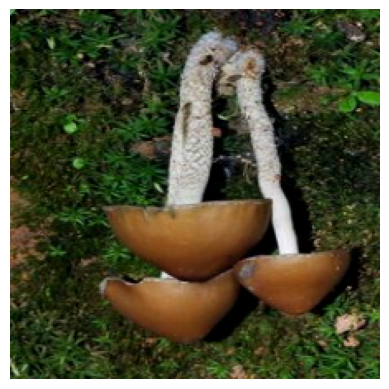

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


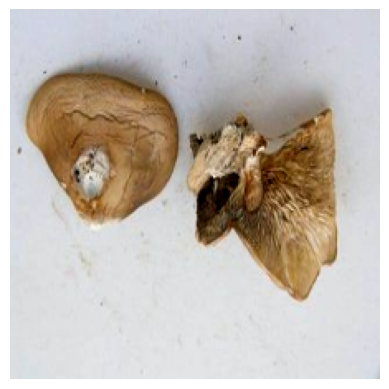

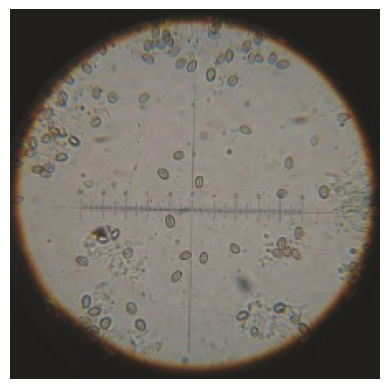

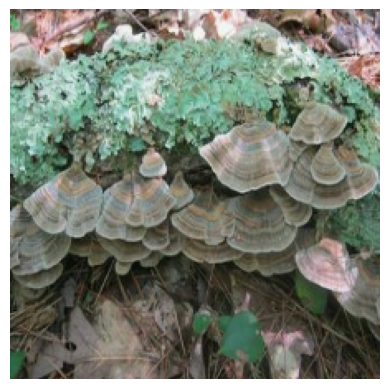

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


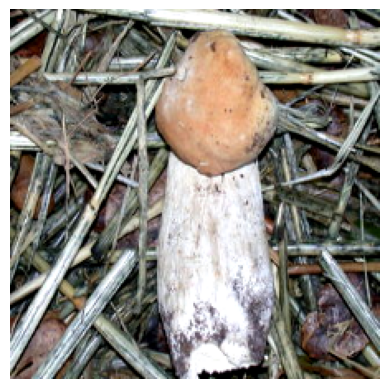

In [16]:
for elt in random_images:
    img = img_preprocessing(elt, **img_preprocessing_args)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

### Tensorflow dataset generation

#### Sample datasets

In [17]:
train_dataset, val_dataset, test_dataset = generate_dataset(df_sample_10_target, df_sample_10_features["image_lien"],
                                                            train_size = 0.8, test_size = 0.5, random_state = 10,
                                                            img_dimensions = (224,224), resize = True,
                                                            augment = True, normalize = True,
                                                            flip_left_right = True,
                                                            flip_up_down = True,
                                                            brightness = True,
                                                            contrast = True,
                                                            saturation = False,
                                                            batch_size = 32)

Encoded target: [ 5  2  5 ...  2 10  5]
Label mapping: {'Boletus edulis': 0, 'Galerina marginata': 1, 'Ganoderma applanatum': 2, 'Hypholoma fasciculare': 3, 'Lepista nuda': 4, 'Pleurotus ostreatus': 5, 'Pluteus cervinus': 6, 'Psilocybe cyanescens': 7, 'Psilocybe zapotecorum': 8, 'Trametes versicolor': 9, 'other': 10}
Train, validation & test splits created successfully.

 Current shapes: 
 X_train: (1216,) 
 X_val: (152,) 
 X_test: (152,) 
Train dataset generated successfully. Number of batches: 38
Validation dataset generated successfully. Number of batches: 5
Test dataset generated successfully. Number of batches: 5


#### Full datasets

In [18]:
train_dataset, val_dataset, test_dataset = generate_dataset(df_target, df_features["image_lien"],
                                                            train_size = 0.8, test_size = 0.5, random_state = 10,
                                                            img_dimensions = (224,224), resize = True,
                                                            augment = True, normalize = True,
                                                            flip_left_right = True,
                                                            flip_up_down = True,
                                                            brightness = True,
                                                            contrast = True,
                                                            saturation = False,
                                                            batch_size = 64)

Encoded target: [ 9  9  9 ... 10 10 10]
Label mapping: {'Boletus edulis': 0, 'Galerina marginata': 1, 'Ganoderma applanatum': 2, 'Hypholoma fasciculare': 3, 'Lepista nuda': 4, 'Pleurotus ostreatus': 5, 'Pluteus cervinus': 6, 'Psilocybe cyanescens': 7, 'Psilocybe zapotecorum': 8, 'Trametes versicolor': 9, 'other': 10}
Train, validation & test splits created successfully.

 Current shapes: 
 X_train: (12160,) 
 X_val: (1520,) 
 X_test: (1520,) 
Train dataset generated successfully. Number of batches: 190
Validation dataset generated successfully. Number of batches: 24
Test dataset generated successfully. Number of batches: 24


In [24]:
# Save datasets
path_save_dataset = "../../storage/datas/tf_datasets/"
path_save_train_dataset = os.path.join(path_save_dataset, "train_dataset")
path_save_val_dataset = os.path.join(path_save_dataset, "val_dataset")
path_save_test_dataset = os.path.join(path_save_dataset, "test_dataset")


tf.data.Dataset.save(train_dataset, path_save_train_dataset)
tf.data.Dataset.save(val_dataset, path_save_val_dataset)
tf.data.Dataset.save(test_dataset, path_save_test_dataset)

In [ ]:
# Load dataset
#reloaded_dataset = tf.data.experimental.load(path)